In [ ]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPool2D
import tensorflow as tf
import os
import random
from keras import regularizers
import numpy as np
from tqdm import tqdm 
import nibabel as nib
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras import layers

In [ ]:
num_classes = 7
img_rows,img_cols = 48,48
batch_size = 64

In [ ]:
train_data_dir = '/content/drive/MyDrive/train'
validation_data_dir = '/content/drive/MyDrive/validation'
test_data_dir = '/content/drive/MyDrive/test (1)'

In [ ]:
'''train_datagen = ImageDataGenerator(
					horizontal_flip=True,
					fill_mode='nearest')'''
train_datagen = ImageDataGenerator(#rotation_range = 180,
                                         width_shift_range = 0.1,
                                         height_shift_range = 0.1,
                                         horizontal_flip = True,
                                         rescale = 1./255,
                                         #zoom_range = 0.2,
                                         validation_split = 0.2
                                        )
validation_datagen = ImageDataGenerator(rescale = 1./255,
                                         validation_split = 0.2)

In [ ]:
'''validation_datagen = ImageDataGenerator(rescale=1./255)'''

'validation_datagen = ImageDataGenerator(rescale=1./255)'

In [ ]:
'''train_generator = train_datagen.flow_from_directory(
					train_data_dir,
					color_mode='grayscale',
					target_size=(img_rows,img_cols),
					batch_size=batch_size,
					class_mode='categorical',
					shuffle=True,
          subset='training')'''
train_generator = train_datagen.flow_from_directory(directory = train_data_dir,
                                                    target_size = (img_rows,img_cols),
                                                    batch_size = 64,
                                                    color_mode = "grayscale",
                                                    class_mode = "categorical",
                                                    subset = "training"
                                                   )

Found 23063 images belonging to 7 classes.


In [ ]:
'''validation_generator = validation_datagen.flow_from_directory(
							validation_data_dir,
							color_mode='grayscale',
							target_size=(img_rows,img_cols),
							batch_size=batch_size,
							class_mode='categorical',
							shuffle=True)'''
validation_generator = validation_datagen.flow_from_directory( directory = test_data_dir,
                                                              target_size = (img_rows,img_cols),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                              subset = "validation"
                                                             )

Found 1432 images belonging to 7 classes.


In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras import layers
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(48, 48,1)))
model.add(Conv2D(64,(3,3), padding='same', activation='relu' ))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(5,5), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(512,(3,3), padding='same', activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
    
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Dense(7, activation='softmax'))
model.compile(
    optimizer = Adam(lr=0.0001), 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
  )
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        18496     
_________________________________________________________________
batch_normalization (BatchNo (None, 48, 48, 64)        256       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       204928    
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 128)       5

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
'''from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from keras.layers import Conv2D,MaxPooling2D
from tensorflow.keras import layers
model = keras.Sequential()

model.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation='relu', input_shape=(32,32,1)))
model.add(layers.AveragePooling2D())

model.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'))
model.add(layers.AveragePooling2D())

model.add(layers.Flatten())

model.add(layers.Dense(units=120, activation='relu'))

model.add(layers.Dense(units=84, activation='relu'))
model.add(layers.Dense(num_classes, activation = 'softmax'))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=7, activation="sigmoid"))
model.summary()'''

'from __future__ import print_function\nimport keras\nfrom keras.preprocessing.image import ImageDataGenerator\nfrom keras.models import Sequential\nfrom keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization\nfrom keras.layers import Conv2D,MaxPooling2D\nfrom tensorflow.keras import layers\nmodel = keras.Sequential()\n\nmodel.add(layers.Conv2D(filters=6, kernel_size=(3, 3), activation=\'relu\', input_shape=(32,32,1)))\nmodel.add(layers.AveragePooling2D())\n\nmodel.add(layers.Conv2D(filters=16, kernel_size=(3, 3), activation=\'relu\'))\nmodel.add(layers.AveragePooling2D())\n\nmodel.add(layers.Flatten())\n\nmodel.add(layers.Dense(units=120, activation=\'relu\'))\n\nmodel.add(layers.Dense(units=84, activation=\'relu\'))\nmodel.add(layers.Dense(num_classes, activation = \'softmax\'))\nmodel.add(Flatten())\nmodel.add(Dense(units=4096,activation="relu"))\nmodel.add(Dense(units=4096,activation="relu"))\nmodel.add(Dense(units=7, activation="sigmoid"))\nmodel.summary()'

In [ ]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

In [ ]:
checkpoint = ModelCheckpoint('Emotion_weights.h5',
                             monitor='val_loss',
                             mode='min',
                             save_best_only=True,
                             verbose=1)

In [ ]:
'''earlystop = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )'''

"earlystop = EarlyStopping(monitor='val_loss',\n                          min_delta=0,\n                          patience=3,\n                          verbose=1,\n                          restore_best_weights=True\n                          )"

In [ ]:
'''reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)'''

"reduce_lr = ReduceLROnPlateau(monitor='val_loss',\n                              factor=0.2,\n                              patience=3,\n                              verbose=1,\n                              min_delta=0.0001)"

In [ ]:
'''callbacks = [earlystop,checkpoint,reduce_lr]'''
callbacks = [checkpoint]

In [ ]:
'''model.compile(loss='categorical_crossentropy',
              optimizer = Adam(lr=0.001),
              metrics=['accuracy'])'''

"model.compile(loss='categorical_crossentropy',\n              optimizer = Adam(lr=0.001),\n              metrics=['accuracy'])"

In [ ]:
epochs=100

In [ ]:
history = model.fit(x=train_generator,epochs = epochs,validation_data = validation_generator)

Epoch 1/100
361/361 [==============================] - 15183s 42s/step - loss: 9.6182 - accuracy: 0.1708 - val_loss: 8.9161 - val_accuracy: 0.1885
Epoch 2/100
361/361 [==============================] - 30s 82ms/step - loss: 8.4812 - accuracy: 0.2201 - val_loss: 7.4472 - val_accuracy: 0.2919
Epoch 3/100
361/361 [==============================] - 29s 81ms/step - loss: 7.4377 - accuracy: 0.2504 - val_loss: 6.4319 - val_accuracy: 0.3359
Epoch 4/100
361/361 [==============================] - 29s 81ms/step - loss: 6.4421 - accuracy: 0.2787 - val_loss: 5.6256 - val_accuracy: 0.3219
Epoch 5/100
361/361 [==============================] - 30s 83ms/step - loss: 5.5089 - accuracy: 0.3096 - val_loss: 4.8825 - val_accuracy: 0.3582
Epoch 6/100
361/361 [==============================] - 29s 81ms/step - loss: 4.7276 - accuracy: 0.3424 - val_loss: 4.0518 - val_accuracy: 0.4316
Epoch 7/100
361/361 [==============================] - 29s 81ms/step - loss: 4.0803 - accuracy: 0.3636 - val_loss: 3.4975 - val_

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
test_generator = test_datagen.flow_from_directory( directory = test_data_dir,
                                                              target_size = (img_rows,img_cols),
                                                              batch_size = 64,
                                                              color_mode = "grayscale",
                                                              class_mode = "categorical",
                                                             )

Found 7178 images belonging to 7 classes.


In [ ]:
model.evaluate(test_generator)

113/113 [==============================] - 3825s 34s/step - loss: 1.1823 - accuracy: 0.7466


[1.1822683811187744, 0.746586799621582]

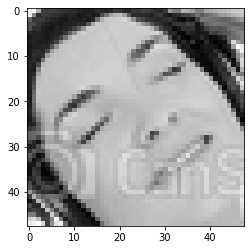

In [ ]:
import cv2,matplotlib.pyplot as plt
img=cv2.imread('/content/drive/MyDrive/test (1)/happy/im285.png')
plt.imshow(img)

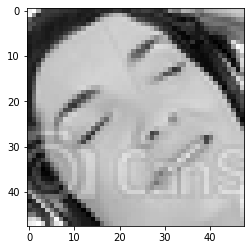

In [ ]:
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(img[0:224,0:224,:3], rgb_weights)
plt.imshow(grayscale_image, cmap=plt.get_cmap("gray"))

In [ ]:
print(img.shape)
print(type(img))

(48, 48, 3)
<class 'numpy.ndarray'>


In [ ]:
train_generator.class_indices

{'angry': 0,
 'disgust': 1,
 'fear': 2,
 'happy': 3,
 'neutral': 4,
 'sad': 5,
 'surprise': 6}

In [ ]:
import cv2
def resize_fn(fp: str) -> np.ndarray:
    """ Resize an image maintaining its proportions
    Args:
        fp (str): Path argument to image file
        scale (Union[float, int]): Percent as whole number of original image. eg. 53
    Returns:
        image (np.ndarray): Scaled image
    """    
    _scale = lambda dim, s: int(dim * s / 100)
    im: np.ndarray = cv2.imread(fp)
    #plt.imshow(im)
    width, height, channels = im.shape
    scale_1=(48*100)/width
    scale_2=(48*100)/height
    print("{},{},{}".format(width,height,channels))
    new_width: int = _scale(width, scale_1)
    new_height: int = _scale(height, scale_2)
    new_dim: tuple = (new_width, new_height)
    return cv2.resize(src=im, dsize=new_dim, interpolation=cv2.INTER_LINEAR)
order=['angry','disgust','fear','happy','neutral','sad','surprised']
resized = resize_fn('/content/drive/MyDrive/test (1)/happy/im1724.png')
print(resized.shape)
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(resized[0:48,0:48,:3], rgb_weights)
grayscale_image = grayscale_image.reshape((48,48,1))
X = np.zeros((1,48, 48, 1), dtype=np.float32)
X[0]=grayscale_image
z=model.predict(X)
t=[x for x in range(0,7) if z[0][x]==max(max(model.predict(X)))]
print("Emotion of the person in the image is: {}".format(order[t[0]]))
emotion_detected=order[t[0]]

48,48,3
(48, 48, 3)
Emotion of the person in the image is: happy


In [ ]:
import pathlib
for path in pathlib.Path('/content/drive/MyDrive/test (1)/happy').iterdir():
  order=['angry','disgust','fear','happy','neutral','sad','surprised']
  resized = resize_fn(str(path))
  rgb_weights = [0.2989, 0.5870, 0.1140]
  grayscale_image = np.dot(resized[0:48,0:48,:3], rgb_weights)
  grayscale_image = grayscale_image.reshape((48,48,1))
  X = np.zeros((1,48, 48, 1), dtype=np.float32)
  X[0]=grayscale_image
  z=model.predict(X)
  t=[x for x in range(0,7) if z[0][x]==max(max(model.predict(X)))]
  if order[t[0]]=='happy':
    print("Emotion of the person in the image is: {}".format(order[t[0]]))
    print(path)
    break

In [ ]:
print(emotion_detected.upper())

HAPPY


In [ ]:
!pip install gtts

In [ ]:
df.iloc[0]['SONG']

'good feeling'

In [ ]:
import pandas as pd
df=pd.read_csv(emotion_detected.upper()+'.csv')
print(df)
from gtts import gTTS 
from IPython.display import Audio
tts = gTTS('Mood detected is: '+emotion_detected.upper()+'and, the list of suggested songs is:')
length_db=len(df)
a=[]
for i in range(0,length_db):
  b=gTTS(df.iloc[i]['SONG']+' by '+df.iloc[i]['ARTIST'])
  b.save('a'+str(i)+'.mp3')
  sound_file = 'a'+str(i)+'.mp3'
  Audio(sound_file, autoplay=True)  
tts.save('audio_file.mp3')
sound_file = 'audio_file.mp3'
#Audio(sound_file, autoplay=True)  

              SONG  ...                   ARTIST
0     good feeling  ...                  FloRida
1   all I wanna do  ...     Jay Park X 1 MILLION
2         all star  ...              Smash mouth
3   life's a dance  ...  John Michael Montgomery
4  I gotta feeling  ...          Black Eyed Peas

[5 rows x 3 columns]


In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment
sound=[]
sound.append(AudioSegment.from_file("/content/audio_file.mp3", format="mp3"))
for i in range(0,length_db):
  a=AudioSegment.from_file("/content/a"+str(i)+".mp3", format="mp3")
  sound.append(a)
# sound1, with sound2 appended (use louder instead of sound1 to append the louder version)
combined=0
for i in sound:
  combined=combined+i

# simple export
file_handle = combined.export("/content/output.mp3", format="mp3")

##FOR HAPPY

In [ ]:
Audio('output.mp3', autoplay=True)

In [ ]:
df.head()

,SONG,YT_LINK,ARTIST
0,good feeling,https://www.youtube.com/watch?v=3OnnDqH6Wj8,FloRida
1,all I wanna do,https://www.youtube.com/watch?v=lT7Q93fy1us,Jay Park X 1 MILLION
2,all star,https://www.youtube.com/watch?v=L_jWHffIx5E,Smash mouth
3,life's a dance,https://www.youtube.com/watch?v=TOp_EW-Mirs,John Michael Montgomery
4,I gotta feeling,https://www.youtube.com/watch?v=uSD4vsh1zDA,Black Eyed Peas


In [ ]:
import cv2
def resize_fn(fp: str) -> np.ndarray:
    """ Resize an image maintaining its proportions
    Args:
        fp (str): Path argument to image file
        scale (Union[float, int]): Percent as whole number of original image. eg. 53
    Returns:
        image (np.ndarray): Scaled image
    """    
    _scale = lambda dim, s: int(dim * s / 100)
    im: np.ndarray = cv2.imread(fp)
    #plt.imshow(im)
    width, height, channels = im.shape
    scale_1=(48*100)/width
    scale_2=(48*100)/height
    print("{},{},{}".format(width,height,channels))
    new_width: int = _scale(width, scale_1)
    new_height: int = _scale(height, scale_2)
    new_dim: tuple = (new_width, new_height)
    return cv2.resize(src=im, dsize=new_dim, interpolation=cv2.INTER_LINEAR)
order=['angry','disgust','fear','happy','neutral','sad','surprised']
resized = resize_fn('/content/drive/MyDrive/test (1)/angry/im0.png')
print(resized.shape)
rgb_weights = [0.2989, 0.5870, 0.1140]
grayscale_image = np.dot(resized[0:48,0:48,:3], rgb_weights)
grayscale_image = grayscale_image.reshape((48,48,1))
X = np.zeros((1,48, 48, 1), dtype=np.float32)
X[0]=grayscale_image
z=model.predict(X)
t=[x for x in range(0,7) if z[0][x]==max(max(model.predict(X)))]
print("Emotion of the person in the image is: {}".format(order[t[0]]))
emotion_detected=order[t[0]]

48,48,3
(48, 48, 3)
Emotion of the person in the image is: angry


In [ ]:
import pandas as pd
df=pd.read_csv(emotion_detected.upper()+'.csv')
print(df)
from gtts import gTTS 
from IPython.display import Audio
tts = gTTS('Mood detected is: '+emotion_detected.upper()+'and, the list of suggested songs is:')
length_db=len(df)
a=[]
for i in range(0,length_db):
  b=gTTS(df.iloc[i]['SONG']+' by '+df.iloc[i]['ARTIST'])
  b.save('a'+str(i)+'.mp3')
  sound_file = 'a'+str(i)+'.mp3'
  Audio(sound_file, autoplay=True)  
tts.save('audio_file.mp3')
sound_file = 'audio_file.mp3'
#Audio(sound_file, autoplay=True)  

               SONG  ...            ARTIST
0  You don't own me  ...             Grace
1           Dreamin  ...         The score
2    Female robbery  ...  The neighborhood
3     Bury a friend  ...     Billie Ellish
4        Without me  ...            Halsey

[5 rows x 3 columns]


In [ ]:
from pydub import AudioSegment
sound=[]
sound.append(AudioSegment.from_file("/content/audio_file.mp3", format="mp3"))
for i in range(0,length_db):
  a=AudioSegment.from_file("/content/a"+str(i)+".mp3", format="mp3")
  sound.append(a)
# sound1, with sound2 appended (use louder instead of sound1 to append the louder version)
combined=0
for i in sound:
  combined=combined+i

# simple export
file_handle = combined.export("/content/output.mp3", format="mp3")

##FOR ANGRY. SIMILARLY, CAN DO FOR ALL THE OTHER EMOTIONS.

In [ ]:
Audio('output.mp3', autoplay=True)

In [ ]:
df.head()

,SONG,YT_LINK,ARTIST
0,You don't own me,https://www.youtube.com/watch?v=8SeRU_ZPDkE,Grace
1,Dreamin,https://www.youtube.com/watch?v=GEK77vOHjyE,The score
2,Female robbery,https://www.youtube.com/watch?v=jwK7-u_0VWk,The neighborhood
3,Bury a friend,https://www.youtube.com/watch?v=HUHC9tYz8ik,Billie Ellish
4,Without me,https://www.youtube.com/watch?v=ZAfAud_M_mg,Halsey
